# Data Cleaning and Overview


# Step 1: Import Python packages and define functions
I need to import (pandas and numpy) packages for cleaning the dataset.<br> 
Since the control data values file (aux_dataset.xlsx file) is provided, I will define some functions to convert the excel worksheets into dictionaries. Then, I use the dictionaries to replace the values accordingly to the control values for each column of the dataset.<br>
To ensure the uniformity of the data, I replaced "FALSE" to "False", "NULL_" to "NULL" and "rectal" to "Rectal" in "clean" column of "braf_mutation" worksheet inside aux_dataset.xlsx file

In [197]:
#import packages
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [198]:
# Define functions 
file = './aux_dataset.xlsx'

# Function to get dictionaries from aux_dataset.xlsx file for cleaning
def get_dict(file,i):
    df_i=pd.read_excel('./aux_dataset.xlsx', sheet_name=i,header=0,index_col=None)
    # replaced "" to "NULL", "FALSE" to "False", "NULL_" to "NULL"
    df_i.clean=df_i.clean.astype(object).replace(np.nan, 'NULL').replace('FALSE','False').replace('NULL_','NULL')
    dict_i=df_i.set_index('raw')['clean'].to_dict()
    return dict_i

# Replace value according to dictionaries
def replace_all(df,col, dic):
    for i, j in dic.items():
        df[str(col)] = df[str(col)].replace(i, j)
    return df[str(col)].astype(str)

def missing_data(df):
    no_null = df.notnull().sum()
    missing = df.isnull().sum()
    percent = df.isnull().sum()/df.shape[0]*100
    missing_data = pd.concat([no_null,missing, percent], axis=1, 
                             keys=['NOT-null','Missing', 'Percent Missing'])
    return missing_data.sort_values(by='Missing', ascending=False)


#return table from a ditionary 
def table_of_dict(dict_):
    df = pd.DataFrame()
    df['raw'] = dict_.keys()
    df['clean'] = dict_.values()
    return df


# Step 2: Import, explore and clean the dataset


In [199]:
cota_data = pd.read_csv('./cota_ds_analyst_dataset.csv')

print('The dataset has {} rows and {} columns'.format(cota_data.shape[0],cota_data.shape[1]))

The dataset has 10000 rows and 10 columns


In [200]:
cota_data.head()

,patient_id,date_of_birth,stage,rectal_or_colon_ca,braf_mutation,resection,lymph_nodes_removed,therapy_type,patient_preference,histological_grade
0,patient_id_0,"December 28, 1953",iiia,colon,not assessed,r0: no residual tumor,1 positive,metastatic,not assessed,g2
1,patient_id_1,2009-07-09,stage iiia,colon,not assessed,not assessed,14,metastatic,no,3
2,patient_id_2,1983-04-16,iiic,colon,not assessed,not assessed,24,metastatic,not assessed,g1
3,patient_id_3,2018-08-13,i,rectal,not assessed,not assessed,1 positive,metastatic,no,not reported
4,patient_id_4,"October 09, 2017",iib,rectal,not assessed,not assessed,>12,adjuvant,yes,g1


In [201]:
missing_data(cota_data)

,NOT-null,Missing,Percent Missing
resection,9211,789,7.89
lymph_nodes_removed,9620,380,3.80
rectal_or_colon_ca,9732,268,2.68
histological_grade,9885,115,1.15
braf_mutation,9974,26,0.26
patient_id,10000,0,0.00
date_of_birth,10000,0,0.00
stage,10000,0,0.00
therapy_type,10000,0,0.00
patient_preference,10000,0,0.00


In [202]:
for i in cota_data.columns:
    print('Unique values of {} column\n{}\n'.format(str(i),cota_data[str(i)].unique()))

Unique values of patient_id column
['patient_id_0' 'patient_id_1' 'patient_id_2' ... 'patient_id_9997'
 'patient_id_9998' 'patient_id_9999']

Unique values of date_of_birth column
['December 28, 1953' '2009-07-09' '1983-04-16' ... '1953-04-18'
 '2012-07-15' 'September 24, 1974']

Unique values of stage column
['iiia' 'stage iiia' 'iiic' 'i' 'iib' 'iiib' 'not assessed' 'stage iib'
 'stage iiib' 'ivb' 'iia' 'stage i' 'stage iva' 'stage iia' 'iva'
 'not staged' 'stage ivb' 'stage 0' 'iic' 'stage iiic' 'unknown'
 'stage i (staging not completed)' 'not reported' 'no neoplasm' 'stage 1'
 '0' '!!a' 'orif of pathologic fracture arm by ortho' 'no records' '111a'
 '1' 'not fully staged' 'stageiva' 'not reporte' 'stage iic']

Unique values of rectal_or_colon_ca column
['colon' 'rectal' nan 'cecum/pancreatic' 'colomn' 'anus' 'colon/rectal'
 'small cell rectal' 'neither found' 'proximal' 'not assessed'
 'no records' 'apendix ca' 'neuroendocrine']

Unique values of braf_mutation column
['not assesse

We can see that the values in each columns are not uniform, so we will need to:
1. "date_of_birth": reformat date
2. "stage": remove the word stage and reformat values
3. "rectal_or_colon_ca": replace the values according to control values<br>
   "braf_mutation": replace the values according to control values<br>
   "therapy_type": replace the values according to control values<br>
4. "resection": replace values with either r0, r1, r2 or NULL
5. "lymph_nodes_removed": reformat values to integers or NULL
6. "patient_preference": reformat values to boolean
7. "histological_grade": replace values with g1, g2, g3, g4 or NULL

### 1. date_of_birth column

The format of date are not uniform

In [203]:
#print('Unique values \n',cota_data.date_of_birth.unique())

In [204]:
cota_data.date_of_birth=pd.to_datetime(cota_data.date_of_birth, errors='ignore')

In [205]:
cota_data.date_of_birth.head()

0   1953-12-28
1   2009-07-09
2   1983-04-16
3   2018-08-13
4   2017-10-09
Name: date_of_birth, dtype: datetime64[ns]

### 2. stage column

In [206]:
#cota_data.stage.unique()

In [207]:
dict_stage={'not assessed':'Not Assessed','not staged':'NULL', 'unknown':'NULL',
            'i (staging not completed)':'i', 'not reported':'Not Reported', '1':'i',
            '!!a':'iia', 'orif of pathologic fracture arm by ortho':'NULL', 
            'no records':'NULL','111a':'iiia', 'not fully staged':'NULL',
            'not reporte':'Not Reported'}

In [208]:
cota_data.stage=cota_data.stage.str.lstrip('stage ')

In [209]:
cota_data.stage=replace_all(cota_data,'stage',dict_stage)#.str.rstrip('abc')

In [210]:
#cota_data.stage.value_counts()

Stage values
 iva             1939
Not Assessed    1576
iiib            1451
iia             1282
ivb             1258
i                898
iiia             467
iiic             421
iib              313
0                141
NULL             117
iic               60
Not Reported      57
no neoplasm       20
Name: stage, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


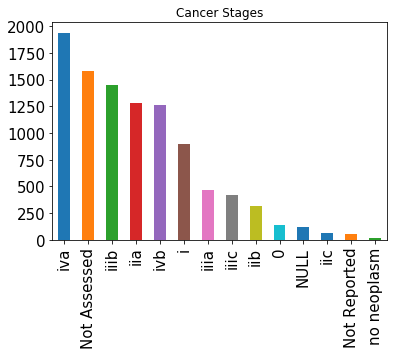

In [211]:
print('Stage values\n',cota_data.stage.value_counts())
print(cota_data.stage.value_counts().plot(kind='bar',fontsize=15,title='Cancer Stages'))

### 3. rectal_or_colon_ca, braf_mutation, therapy_type columns

In [212]:
xls = pd.ExcelFile('./aux_dataset.xlsx', on_demand = True)
for i in xls.sheet_names:
    dict_i=get_dict(file,str(i))
    cota_data[str(i)]= replace_all(cota_data,str(i), dict_i)
    

In [213]:
cota_data.rectal_or_colon_ca.unique()

array(['Colon', 'Rectal', 'NULL'], dtype=object)

In [214]:
cota_data.braf_mutation.unique()

array(['Not Assessed', 'False', 'Not Reported', 'True', 'NULL'],
      dtype=object)

In [215]:
cota_data.therapy_type.unique()

array(['metastatic', 'adjuvant', 'neoadjuvant'], dtype=object)

Colon     7497
Rectal    2118
NULL       385
Name: rectal_or_colon_ca, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


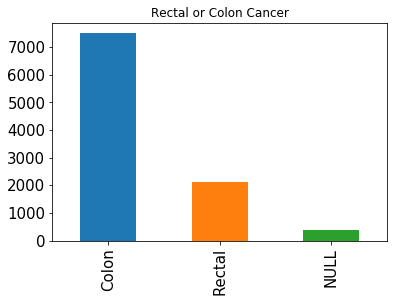

In [216]:
print(cota_data.rectal_or_colon_ca.value_counts())
print(cota_data.rectal_or_colon_ca.value_counts().plot(kind='bar',fontsize=15,title='Rectal or Colon Cancer'))

Not Assessed    8371
False           1152
Not Reported     266
True             175
NULL              36
Name: braf_mutation, dtype: int64


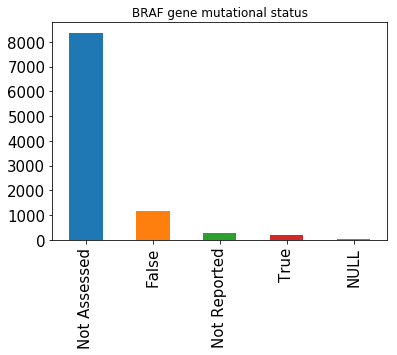

In [217]:
print(cota_data.braf_mutation.value_counts())
cota_data.braf_mutation.value_counts().plot(kind='bar',fontsize=15,title='BRAF gene mutational status')

metastatic     3935
adjuvant       3271
neoadjuvant    2794
Name: therapy_type, dtype: int64


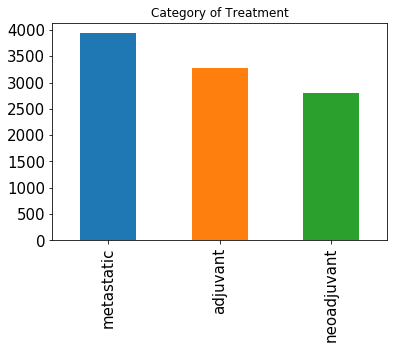

In [218]:
print(cota_data.therapy_type.value_counts())
cota_data.therapy_type.value_counts().plot(kind='bar',title='Category of Treatment',fontsize=15)

### 4. resection column

In [219]:
#cota_data.resection.unique()

In [220]:
dict_resection={'r0: no residual tumor':'r0', 'not assessed':'Not Assessed',
                'not reported':'Not Reported','r1: microscopic residual tumor':'r1',
                np.nan:'NULL','r2: macroscopic residual tumor':'r2',
                'r2: macrospopic residual tumor':'r2','r2 (colonoscopy only)':'r2',
                'r2, then 2nd time r0':'r0'}

In [221]:
#cota_data.resection=cota_data.resection.astype(str).str[0:2]
cota_data.resection=replace_all(cota_data,'resection',dict_resection)

In [222]:
cota_data.resection.unique()

array(['r0', 'Not Assessed', 'Not Reported', 'r1', 'NULL', 'r2'],
      dtype=object)

Not Assessed    4673
r0              2703
Not Reported    1496
NULL             789
r1               251
r2                88
Name: resection, dtype: int64


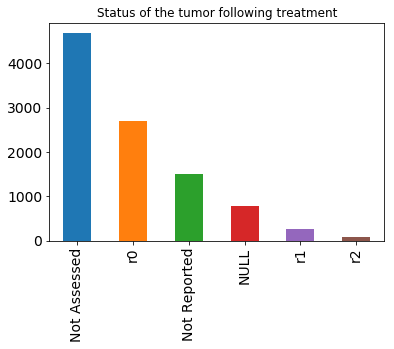

In [223]:
print(cota_data.resection.value_counts())
cota_data.resection.value_counts().plot(kind='bar',fontsize=14,title='Status of the tumor following treatment')

### 5. lymph_nodes_removed column

In [224]:
cota_data.lymph_nodes_removed.unique()

array(['1 positive', '14', '24', '>12', '15', '21', '25', '9', '0', nan,
       '>18', '> 12', '12 (post tx)', '26', '5', '18', '11', '22', 'no',
       '12', '30', '13', '20', '<12', '16', '33', '17', '0 reported',
       '>7', '10', 'notassessed', '19', '7', '32', 'thirty', '41', '52',
       '43', '28', '46', '27', '36', '6', '23', 'not assesssed', '29',
       '47', 'not assessed from rectal', '51', 'not assesesd', '56',
       'no records', '69', '34', 'not assesses', '8', '3',
       'not available', 'not asssessed'], dtype=object)

In [225]:
#cota_data.lymph_nodes_removed.value_counts()

In [226]:
dict_lymph_nodes_removed={'1 positive':'1','0 reported':'0','no':'NO',
                          'notassessed':'Not Assessed',
                          'thirty':'30',np.nan:'NULL','not assesssed':'Not Assessed',
                          'not assessed from rectal':'Not Assessed',
                          'not assesesd':'Not Assessed','12 (post tx)':'12',
                          'no records':'NULL','not assesses':'Not Assessed',
                          'not available':'NULL','not asssessed':'Not Assessed'}

In [227]:
cota_data.lymph_nodes_removed=replace_all(cota_data,'lymph_nodes_removed',dict_lymph_nodes_removed)
cota_data.lymph_nodes_removed=cota_data.lymph_nodes_removed.str.lstrip('>').str.lstrip('<').str.lstrip('> ')


In [228]:
cota_data.lymph_nodes_removed.unique()

array(['1', '14', '24', '12', '15', '21', '25', '9', '0', 'NULL', '18',
       '26', '5', '11', '22', 'NO', '30', '13', '20', '16', '33', '17',
       '7', '10', 'Not Assessed', '19', '32', '41', '52', '43', '28',
       '46', '27', '36', '6', '23', '29', '47', '51', '56', '69', '34',
       '8', '3'], dtype=object)

12    2134
18    1006
0      826
1      509
7      426
Name: lymph_nodes_removed, dtype: int64


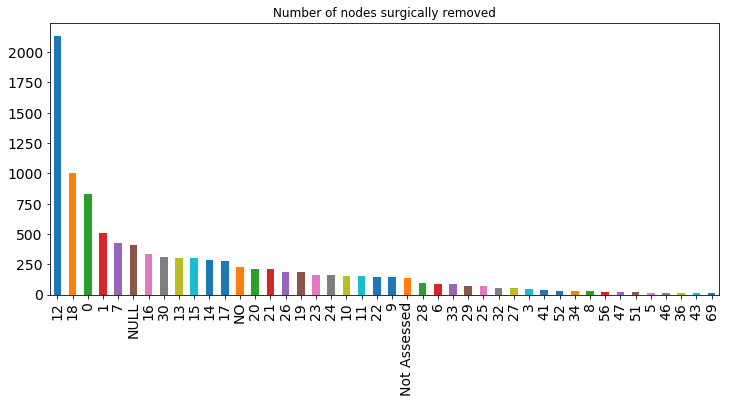

In [229]:
print(cota_data.lymph_nodes_removed.value_counts().head())
cota_data.lymph_nodes_removed.value_counts().plot(kind='bar',figsize=(12,5),fontsize=14,title='Number of nodes surgically removed')

### 6. patient_preference column

In [230]:
cota_data.patient_preference.unique()

array(['not assessed', 'no', 'yes', 'n o', 'yes (not at jtcc)',
       'no records', '0', 'yes (no consult)', 'yes(lost to follow up)',
       'consult only', 'unknown'], dtype=object)

In [231]:
dict_patient_preference={'not assessed':'Not Assessed', 'no':'False', 'yes':'True', 
                         'n o':'False','yes (not at jtcc)':'True','no records':'NULL',
                         '0':'False','yes (no consult)':'True', 
                         'yes(lost to follow up)':'True','consult only':'True', 
                         'unknown':'NULL'}

In [232]:
cota_data.patient_preference=replace_all(cota_data,'patient_preference',dict_patient_preference)

In [233]:
cota_data.patient_preference.unique()

array(['Not Assessed', 'False', 'True', 'NULL'], dtype=object)

False           6701
Not Assessed    1799
True            1475
NULL              25
Name: patient_preference, dtype: int64


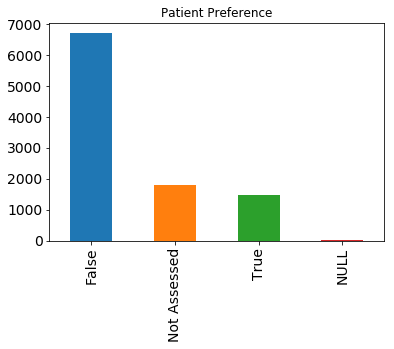

In [234]:
print(cota_data.patient_preference.value_counts().head())
cota_data.patient_preference.value_counts().plot(kind='bar',fontsize=14,title='Patient Preference')


### 7. histological_grade column

In [235]:
cota_data.histological_grade.unique()

array(['g2', '3', 'g1', 'not reported', 'not assessed', 'g3', '2', 'g2-3',
       '1', nan, 'no neoplasm', 'gi', 'low grade', 'mucinous carcinoma',
       'no records', 'ivb', 'high grade(3)', '4'], dtype=object)

In [236]:
dict_histological_grade={'3':'g3','not reported':'Not Reported', 
                         'not assessed':'Not Assessed','2':'g2','1':'g1', np.nan:'NULL',
                         'gi':'g1', 'low grade':'g1', 'mucinous carcinoma':'NULL',
                         'no records':'NULL', 'ivb':'NULL', 'high grade(3)':'g3', 
                         '4':'g4','no neoplasm':'NULL'}

In [237]:
cota_data.histological_grade=replace_all(cota_data,'histological_grade',dict_histological_grade)

g2              4646
Not Assessed    2327
g3              1917
g1               696
Not Reported     203
NULL             186
g2-3              15
g4                10
Name: histological_grade, dtype: int64


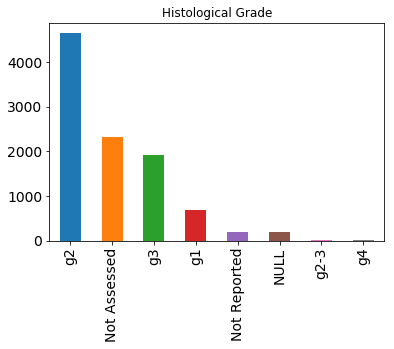

In [238]:
print(cota_data.histological_grade.value_counts())
cota_data.histological_grade.value_counts().plot(kind='bar',fontsize=14,title='Histological Grade')


In [239]:
# Save the cleaned dataset
cota_data.to_csv('cota_ds_analyst_dataset_Cao_Lexi.csv',index=False,index_label=None)


In [240]:
#cota_data[cota_data.isin(['Not Assessed','NULL'])]

# Step 3: Answers to given questions

### 1. How many patients have a therapy type of ‘metastatic’ and stage IV (includes IVa,b,c etc..)?
Answer: 1259 patients

In [241]:
metastatic_stageiv=cota_data[(cota_data.therapy_type=='metastatic')& (cota_data.stage.str.rstrip('abc')=='iv')]
print('1. There are {} patients have a therapy type of metastatic and stage IV'.format(metastatic_stageiv.shape[0]))

1. There are 1259 patients have a therapy type of metastatic and stage IV


### 2.	How many patients have colon cancer, with stage III (include IIIa,b,c.. etc) and therapy type of ‘adjuvant’?
Answer: 580 patients

In [242]:
colon_stageiii_adjuvant=cota_data[(cota_data.rectal_or_colon_ca=='Colon')&(cota_data.stage.str.rstrip('abc')=='iii')&(cota_data.therapy_type=='adjuvant')]
print('2. There are {} patients have colon cancer, with stage III and therapy type of adjuvant'.format(colon_stageiii_adjuvant.shape[0]))


2. There are 580 patients have colon cancer, with stage III and therapy type of adjuvant


### 3.	What proportion of patients have rectal cancer?
Answer: 0.2202808

In [243]:
rectal=cota_data[(cota_data.rectal_or_colon_ca=='Rectal')]
# Keep only rows with Rectal and Colon values 
rectal_and_colon=cota_data[(cota_data.rectal_or_colon_ca.isin(['Rectal', 'Colon']))]
print('3.\nNumber of patients with rectal cancer = {}'.format(rectal.shape[0]))
print('Number of patients with rectal or colon cancer = {}'.format(rectal_and_colon.shape[0]))
print('Proportion of patients have rectal cancer = {}/{} = {}'.format(rectal.shape[0],rectal_and_colon.shape[0],rectal.shape[0]/rectal_and_colon.shape[0]))

3.
Number of patients with rectal cancer = 2118
Number of patients with rectal or colon cancer = 9615
Proportion of patients have rectal cancer = 2118/9615 = 0.2202808112324493


### 4.	What is the probability mass function of lymph_nodes_removed?

 A Probability Mass Function (PMF), also called a frequency function, gives probabilities for discrete random variables. 
 
A PMF equation looks like this: P(X = x), which means the probability that X takes on some value x.

I will drop NULL, Not Assessed and NO values because they are not helpful for the calculation, and because values with NO are ambiguous to be included in this calculation

In [244]:
# Drop NULL and Not Assessed values because they're not helpful for calculation
lymph_nodes_removed=cota_data.lymph_nodes_removed[(cota_data.lymph_nodes_removed!='NULL')&(cota_data.lymph_nodes_removed!='Not Assessed')&(cota_data.lymph_nodes_removed!='NO')]
print('\n4.\nAfter dropping NULL, Not Assessed and NO values, lymph_nodes_removed column has {} rows'.format(lymph_nodes_removed.shape[0]))



4.
After dropping NULL, Not Assessed and NO values, lymph_nodes_removed column has 9224 rows


PMF
    lymph_nodes_removed  Probability
3                   12     0.231353
9                   18     0.109063
8                    0     0.089549
0                    1     0.055182
20                   7     0.046184
17                  16     0.036210
14                  30     0.033933
15                  13     0.032958
4                   15     0.032415
1                   14     0.030681
19                  17     0.029814
16                  20     0.022984
5                   21     0.022767
10                  26     0.020490
22                  19     0.019948
32                  23     0.017780
2                   24     0.017563
21                  10     0.017021
12                  11     0.016262
13                  22     0.015720
7                    9     0.015720
27                  28     0.010516
31                   6     0.009866
18                  33     0.009540
33                  29     0.007372
6                   25     0.007372
29                  27 

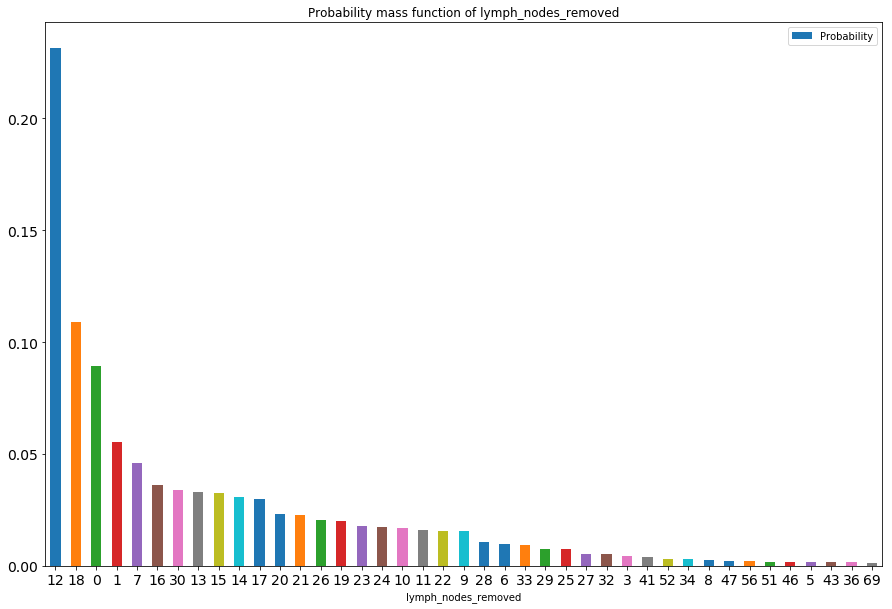

In [245]:
# Probability mass function is equal to total counts of each value in lymph_nodes_removed
# divided by total number of entries in lymph_nodes_removed column (excluding NULL and 
# Not Assessed values)
from collections import Counter
C = Counter(lymph_nodes_removed)
total = float(sum(C.values()))
for key in C: C[key] /= total #Calculate pmf
    
n=table_of_dict(C).rename(columns={'raw':'lymph_nodes_removed', 
                                   'clean':'Probability'}).sort_values(by='Probability', 
                                                                       ascending=False)

hist=n.plot.bar(x='lymph_nodes_removed', y='Probability',
                title='Probability mass function of lymph_nodes_removed',
                fontsize=14,rot=0,figsize=(15,10))
print('PMF\n',n)
print(hist)
#n.to_csv('pmf.csv', index=False)

Extra steps to test missing values

In [253]:
d=['NULL','Not Assessed','Not Reported','NO']
cota_data[
          (cota_data.stage.isin(d))&\
          (cota_data.rectal_or_colon_ca.isin(d))&\
          (cota_data.braf_mutation.isin(d))&\
          #(cota_data.resection.isin(d))&\
          #(cota_data.lymph_nodes_removed.isin(d))&\
          #(cota_data.therapy_type.isin(d))&\
          (cota_data.patient_preference.isin(d))&\
          (cota_data.histological_grade.isin(d))
         ]

,patient_id,date_of_birth,stage,rectal_or_colon_ca,braf_mutation,resection,lymph_nodes_removed,therapy_type,patient_preference,histological_grade
521,patient_id_521,1966-09-20,Not Assessed,NULL,Not Assessed,Not Assessed,17,metastatic,Not Assessed,Not Assessed
3964,patient_id_3964,2000-06-01,Not Assessed,NULL,Not Assessed,Not Reported,16,neoadjuvant,Not Assessed,NULL
5931,patient_id_5931,1999-01-06,Not Assessed,NULL,Not Assessed,Not Assessed,1,adjuvant,Not Assessed,Not Assessed
